# Property Price Prediction Project


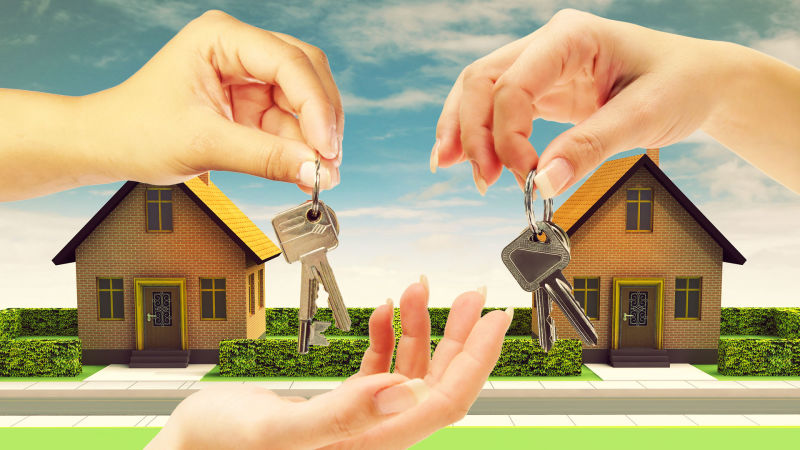

In [2]:

import IPython
IPython.display.Image('https://i-media.vyaparify.com/vcards/blogs/95898/Buysell1.jpg')

# Step 1 : Importing libraries

In [3]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score #root_mean_squared_error
from sklearn.datasets import fetch_california_housing
import seaborn as sns 
import warnings as w
w.filterwarnings('ignore')
print("Modules Loaded Successfully!")

Modules Loaded Successfully!


# Step 2 : Load data Create DataFrame

In [4]:

data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
print(data_dict['target_names'])

['MedHouseVal']


In [7]:
df = pd.DataFrame(data_dict['data'],columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']


print("Data loaded successfully")

Data loaded successfully


# Step 3 : Understanding Data Using EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13491,3.9191,17.0,5.798936,1.07234,3533.0,3.758511,34.06,-117.4,1.016


In [10]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
# hundreds of thousands of dollars ($100,000) 1 lakh Dollars
# average number of household members
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8216,1.9387,30.0,3.655294,1.169412,3543.0,4.168235,33.79,-118.19,1.417


In [13]:
# All data Must be in Numerical, Dataset contains all values in numerical
# We can proceed this for Analysis

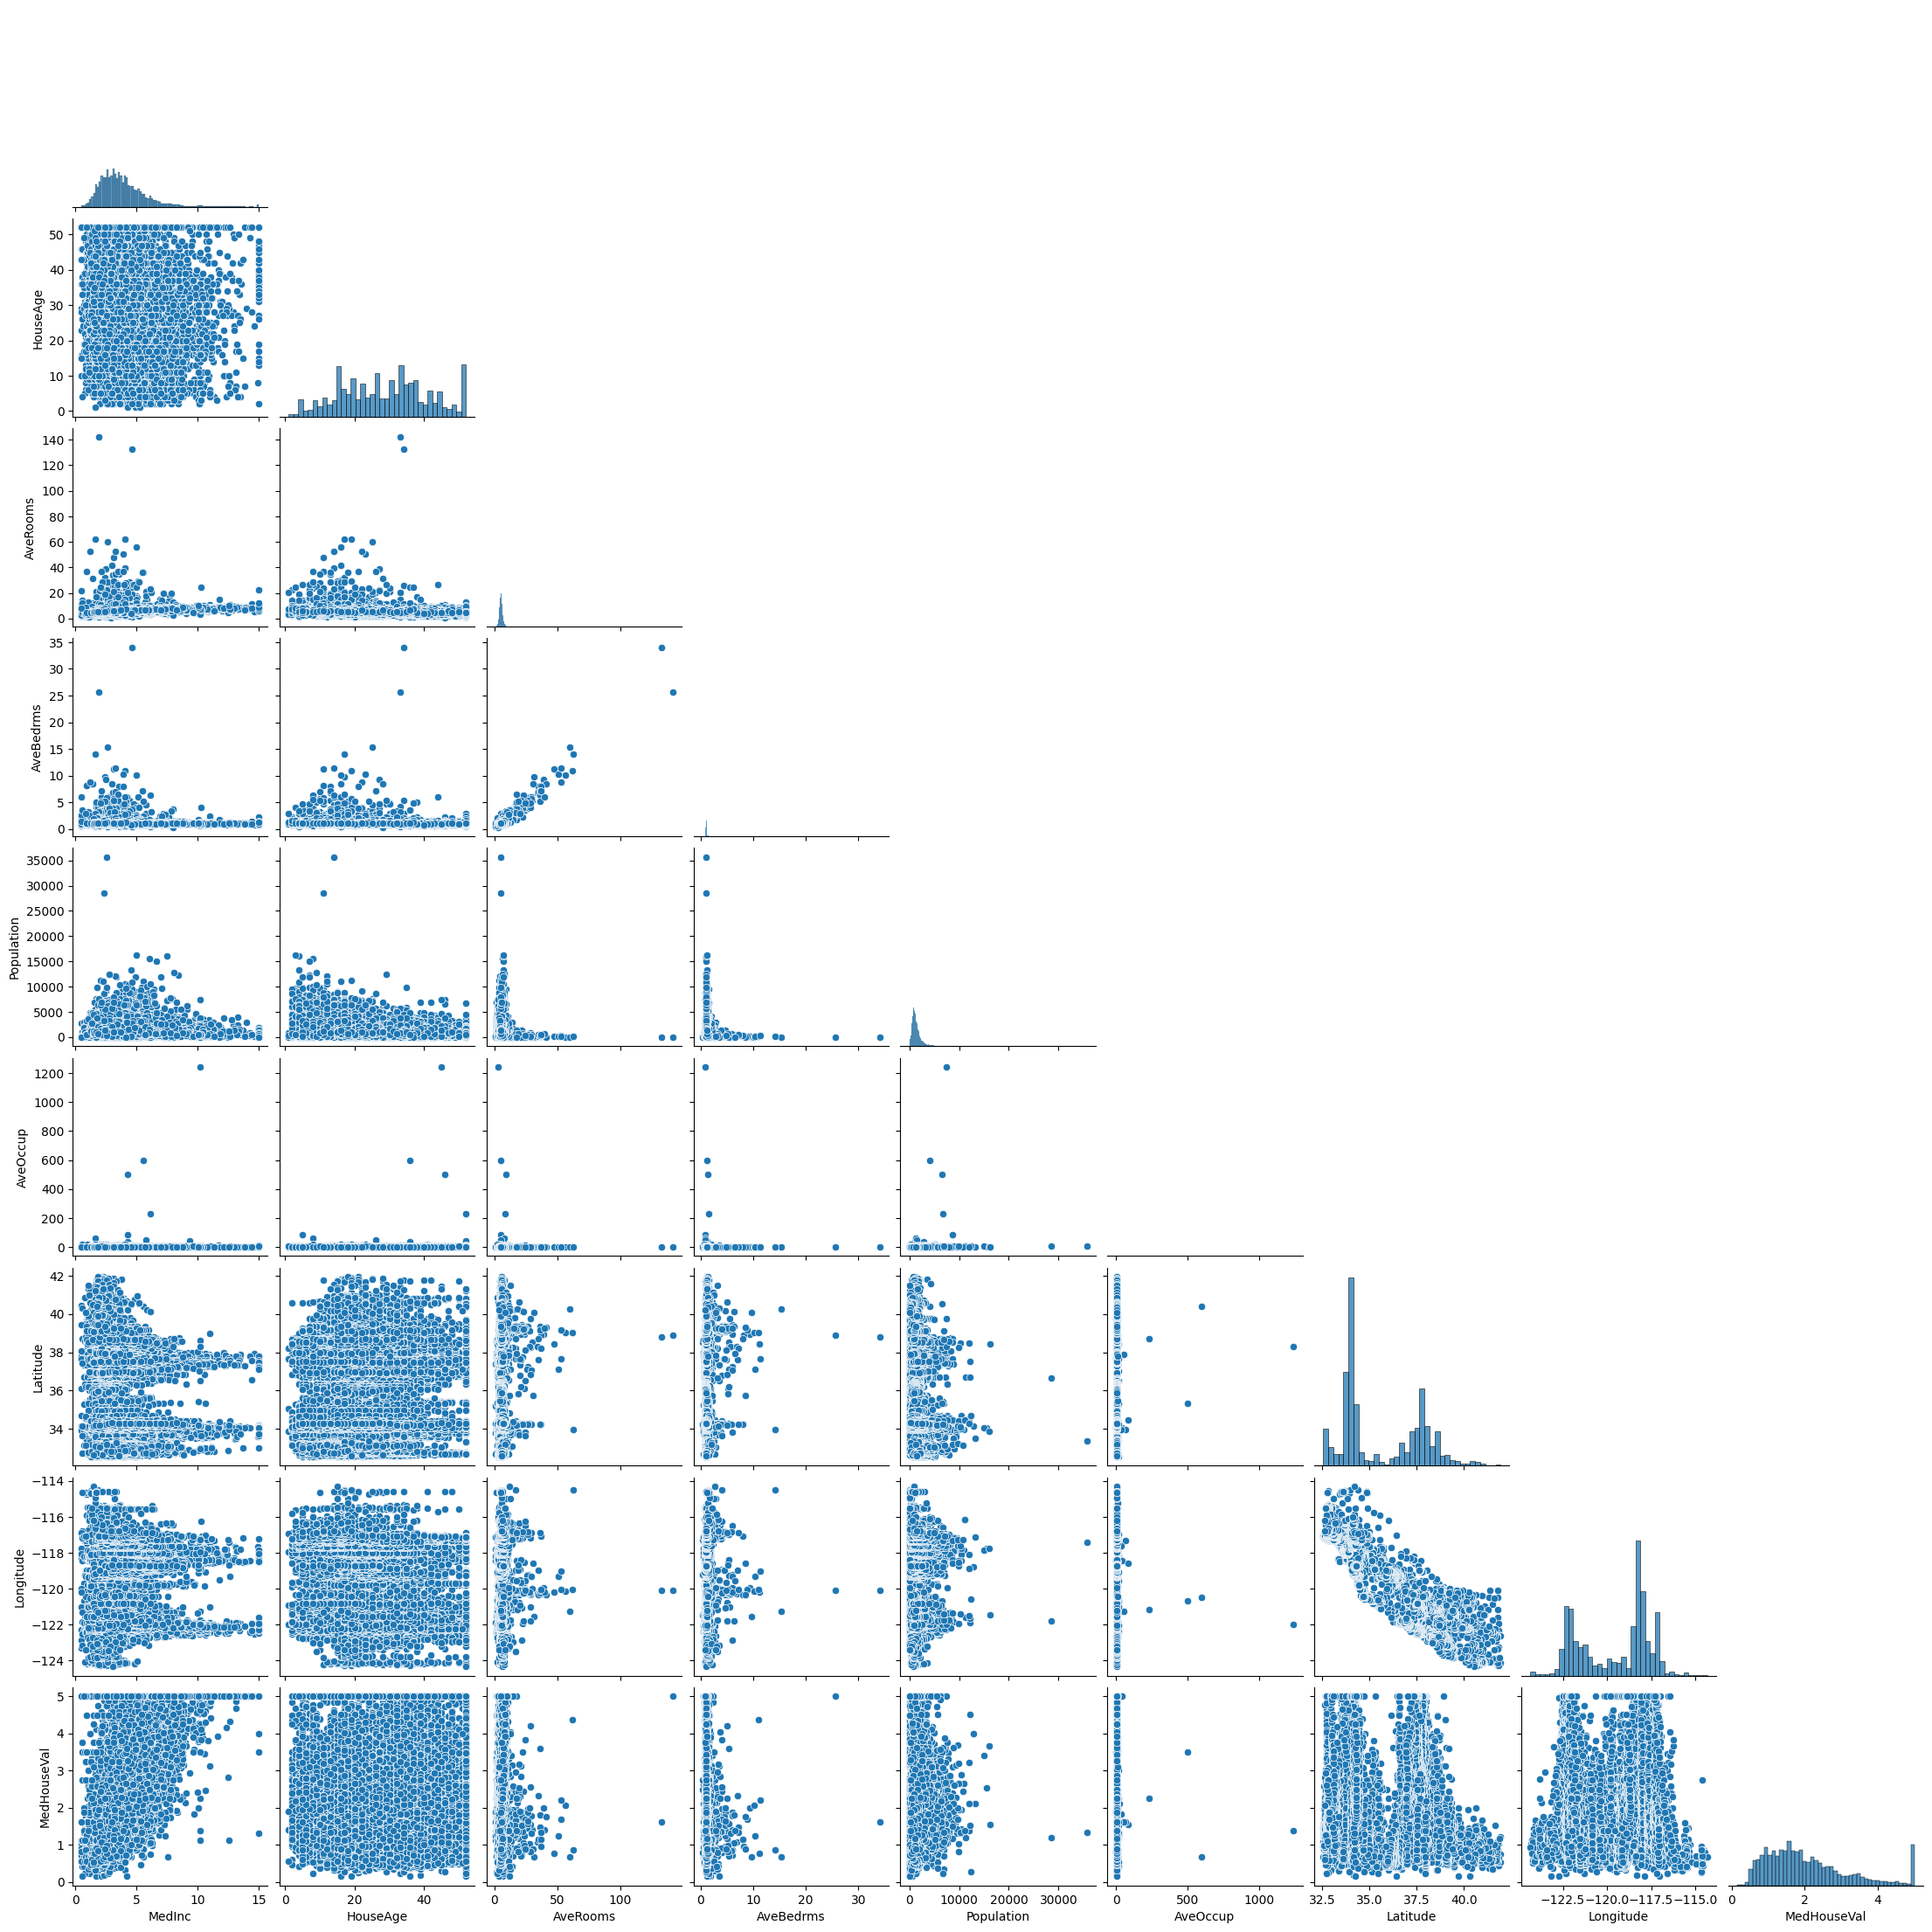

In [14]:
# Checking data Distribution

sns.pairplot(data = df,corner = True)
plt.show()

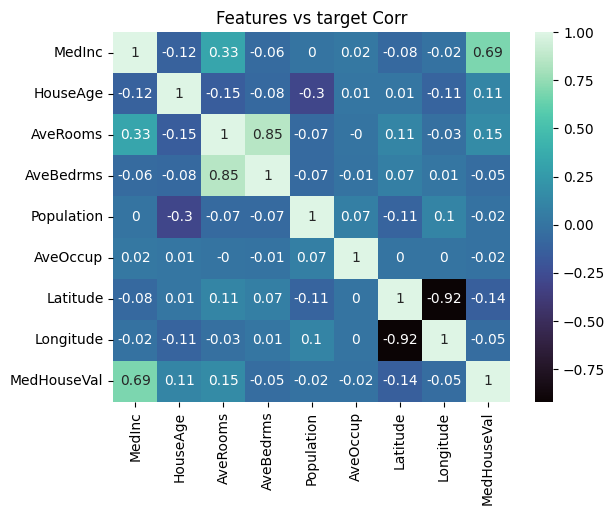

In [15]:
# Checking data Distribution

plt.title('Features vs target Corr')
sns.heatmap(df.corr().round(2), annot = True,cmap = 'mako')
# cmap = color_map ( -1 to 1)
plt.show()

In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


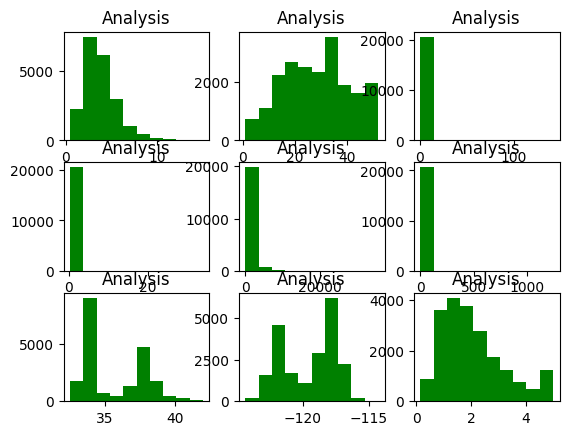

In [17]:
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'g')
  plt.title("Analysis")  
plt.show()

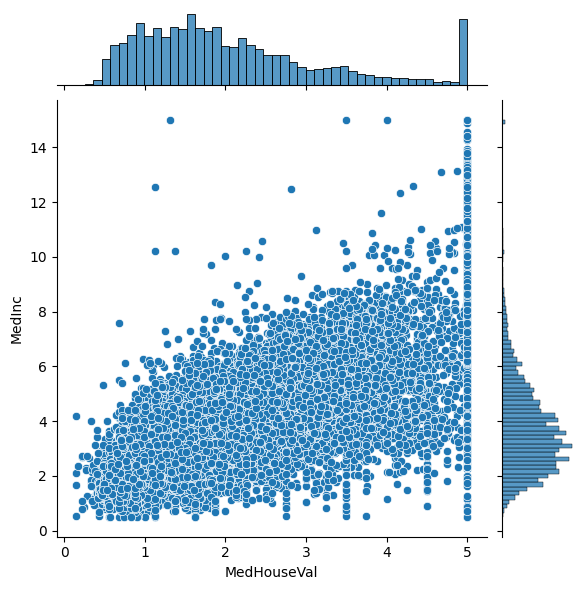

In [18]:
# Distribution of target Value MedHousevalue vs MedInc

sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

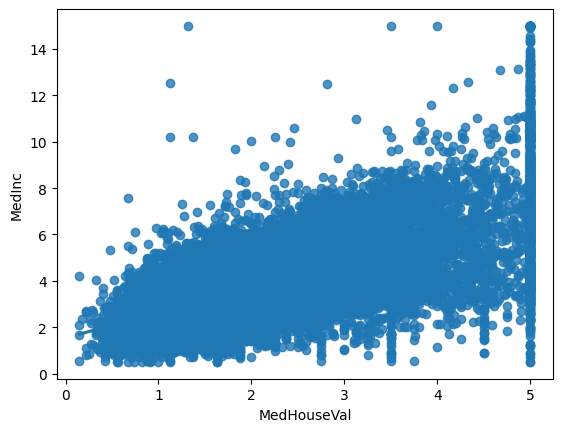

In [19]:
sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

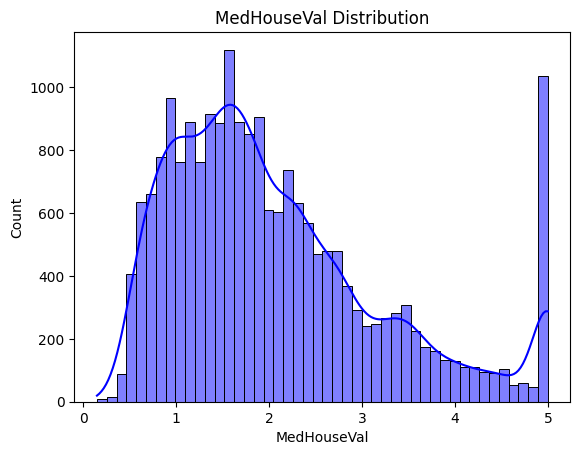

In [20]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b',kde= True)
plt.show()

# Step 4 : Feature Engineering 

In [21]:
# Convert data to Same Scale for better prediction
# normalization = MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()

scaler.fit(X)  # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')

Done


# Step 5 : Train test Split: Split Data for Training and testing Part

In [22]:
#train rest split : divide into test and train part 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = .2,random_state=50)
print("done")

done


In [23]:
print("Shape of x_Train",X_train.shape)
print("Shape of x_Test",X_test.shape)
print("Shape of y_Train",y_train.shape)
print("Shape of y_Test",y_test.shape)

Shape of x_Train (16512, 8)
Shape of x_Test (4128, 8)
Shape of y_Train (16512,)
Shape of y_Test (4128,)


# Step 6 : Model Building

###### 6.1 Linear Model using Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Object Creation

lr_model.fit(X_train,y_train) # Trainig Model

LinearRegression()

###### 6.1.2 : Model prediction 

In [106]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

Done


In [107]:
# 20 %: Actual answer: y_test, Predcited: y_pred

lr_compare_df = pd.DataFrame({'Actual House price':y_test,
             'Predicted House price':y_pred})

print('Done')

Done


In [108]:
lr_compare_df

,Actual House price,Predicted House price
4712,3.550,2.123457
2151,0.707,0.938914
15927,2.294,2.699412
82,1.125,1.710609
8161,2.254,2.819466
...,...,...
8567,3.822,2.618178
17969,2.375,2.424786
12376,1.585,1.512444
8019,2.091,2.058117


In [109]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 0.5330554582985485


In [110]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 0.536847973053985


In [111]:
lr_rmse = lr_mse**.5

print('Lr RMSE',lr_rmse)

Lr RMSE 0.7326991013055667


In [112]:
# Trainig Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('testing Score',lr_test_score)


Training Score 0.6067951495079493
testing Score 0.6007779215684652


In [31]:
# Model score : apx:60% Model not that much good 
# Alternate Model call
# Variance inflation factor
# VIF > 10 we can drop that column
# Bias vs Variance Trade off : Intersect

# Training score : High, Testing score  : Low  = Overfit 
# Training score : Low, Testing score  : Low  = Underfit 
# Training score : Good, Testing score : Good  = Balanced fit 

# Pca( Principal Component Analysis) is used in dimentionality reduction technique 

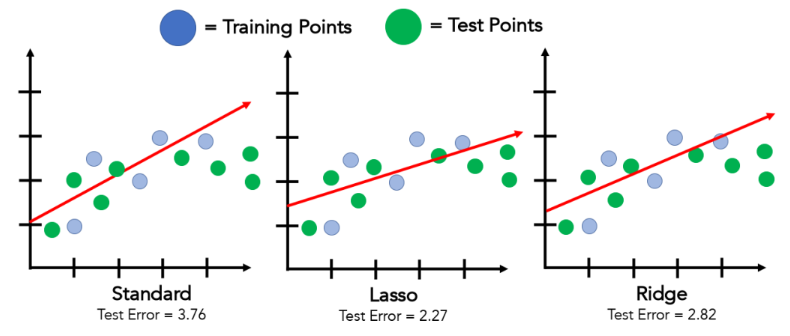


###### 6.1.3 : checking VIF and Drop column if value VIF >10 

In [113]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2295,-1.250711,0.425936,-0.439877,0.188742,-0.638868,-0.082434,1.647145,-1.0034


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']  = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
9583,-0.503307,-0.765935,-0.768569,-0.022356,-0.480802,-0.140298,1.038503,-1.447627,1


In [116]:
X_train_df.shape[1]

9

In [35]:
X_train_df.values

array([[0.09914346, 0.80392157, 0.01379821, ..., 0.16259299, 0.61155378,
        1.        ],
       [0.08328161, 0.54901961, 0.03167034, ..., 0.01806589, 0.72211155,
        1.        ],
       [0.1362395 , 0.29411765, 0.0314498 , ..., 0.07013815, 0.70318725,
        1.        ],
       ...,
       [0.22414174, 0.21568627, 0.0306504 , ..., 0.1477152 , 0.64043825,
        1.        ],
       [0.19951449, 0.74509804, 0.0243002 , ..., 0.13283741, 0.60557769,
        1.        ],
       [0.2103971 , 0.05882353, 0.04594995, ..., 0.21785335, 0.70816733,
        1.        ]])

In [117]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending= False)

# Because Latitude and Longitude has high corr and vif close to 10 we can drop one or bothdrop the columns

,Features,VIF factor
6,Latitude,9.388106
7,Longitude,9.055071
2,AveRooms,8.622642
3,AveBedrms,7.277987
0,MedInc,2.486713
1,HouseAge,1.240207
4,Population,1.136970
5,AveOccup,1.009071
8,Intercept,1.000038


In [118]:
col = list(X.columns)
col.remove('Latitude')

# print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
255,0.04781,0.584852,0.216482,-0.194662,-0.206172,-0.041738,0.708618


In [119]:
def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model



In [120]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [121]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.54151,0.534244,0.576743,0.626319,0.791403,0.534244


In [122]:
from sklearn.linear_model import Lasso,Ridge

In [125]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000891,0.921905,1.345934,1.160144,-0.000891


In [126]:
ml_model = Ridge

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.54151,0.534245,0.576763,0.626316,0.791402,0.534245


In [127]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [128]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model = built_model(Ridge,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)

    display(temp_df)
    break

  display(clear=True)

Score is: 0.6067450510265386
Best random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


In [135]:
final_model

Ridge()

In [136]:
temp_df

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


# Step 7 : Model Save and Localhost Deployment 


In [137]:
import pickle

with open('house_price_pred_ridge_model.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and Scaller Saved Successfully!!')

ML model and Scaller Saved Successfully!!


In [138]:
#Ml Model: Client:
# Website: Input Value: Prediction
# Website: Python: Django, Flask, Fastapi, : Streamlit
# Streamlit: Python Web-based, Framework, Fast ML model test website
# Streamlit = Devlpoment + Deployment(For ML Engineers)

# Step 8 : 

In [130]:
# pip install streamlit

In [139]:
import streamlit as s
print(0)




0
^C


In [ ]:
!streamlit run house.py

In [133]:
os.getcwd()

'C:\\Users\\Govind Ahuja'

In [140]:
df.to_csv('California.csv')
print('Done')

Done


In [146]:
for i in df[col]:
    min_value,max_value = df[i].agg(['min','max'])

    print('min ',min_value)
    print('max ',max_value)

min  0.4999
max  15.0001
min  1.0
max  52.0
min  0.8461538461538461
max  141.9090909090909
min  0.3333333333333333
max  34.06666666666667
min  3.0
max  35682.0
min  0.6923076923076923
max  1243.3333333333333


In [145]:
temp_df = pd.read_csv('California.csv')
print('Done')

Done


# Step 9 : Live Deployment Using Streamlit

In [147]:
#Github : Folder Housing Price Project 
# requirement.txt = we will write those which is important for  

In [148]:
np.__version__

'2.1.3'

In [150]:
pd.__version__

'2.2.3'

In [152]:
s.__version__

'1.45.1'